In [31]:
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt

System Naming

[Tank]====(p0,T0)====[Pressure Reducer]====[Hose (p1,T1) , ... , (pk,Tk)]====[Fitting]==(pk+1,Tk+1)==[Main Valve]==(pk+2,Tk+2)==[Nozzle]

In [72]:
k=3 # hose segments
n = 1+k+2 # total number of indices

main_valve = n-2
nozzle = n-1

p = np.zeros(n)
T = np.zeros(n)
roh = np.zeros(n)

# grab values like this:
# p[nozzle], T[main_valve]
# or
# p[0], T[0], roh[0]

In [73]:
fuel = "Nitrogen"

p[0] = 300 # bar
T[0] = 293 # K

H = CP.PropsSI('H','P',p[0] * 1e5,'T',T[0], fuel) # assume Enthalpy constant ofer the whole system

def CP_temp(pressure):
    # enter pressure in bar
    T = CP.PropsSI('T','P',pressure * 1e5,'H',H, fuel) # [K]
    return T

def CP_roh(pressure):
    # enter pressure in bar
    D = CP.PropsSI('D','P',pressure * 1e5,'H',H, fuel) # [kg/m³]
    return D


# determine conditions before the hose
p[1] = 12 # bar

# update Temp and Density from given pressure
def update_gas():
    for i in range(n):
        if p[i] != 0:
            T[i] = CP_temp(p[i])
            roh[i] = CP_roh(p[i])


update_gas()

# handle hose segments


# handle fitting segment


# handle nozzle segment

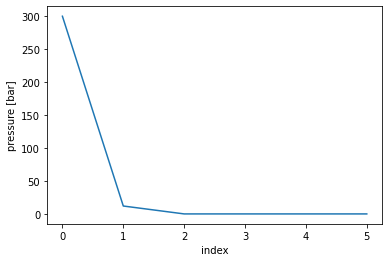

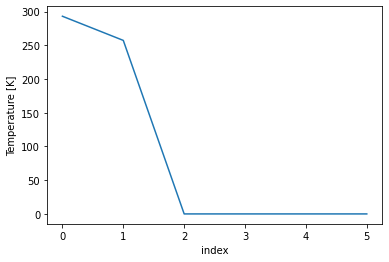

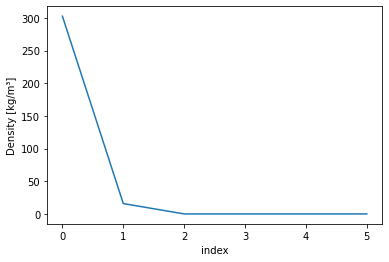

In [74]:
plt.plot(range(n), p)
plt.ylabel("pressure [bar]")
plt.xlabel("index")
plt.show()

plt.plot(range(n), T)
plt.ylabel("Temperature [K]")
plt.xlabel("index")
plt.show()

plt.plot(range(n), roh)
plt.ylabel("Density [kg/m³]")
plt.xlabel("index")
plt.show()